# Cloudy Days in Leesburg

This notebook was inspired by the suspicion that, during a certain recent time window, weekends were much cloudier and rainier than weekdays. So I decided to make a proper analysis by downloading weather data and using python/pandas to do some statistical analysis. You should read through this code carefully and figure out what each line of code is doing. When in doubt, use the internet!

In [3]:
import pandas as pd
pd.set_option("display.max_columns",300)

/tmp/ipykernel_2208835/1252949990.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Analyze Weather data

In [4]:
# Before running this cell, ensure you have the file in the same directory as this jupyter notebook.
df = pd.read_csv('weather-daylight.csv')

In [5]:
df.columns

Index(['id1', 'id2', 'station', 'valid', 'tmpf', 'dwpf', 'relh', 'drct',
       'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2',
       'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes',
       'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr',
       'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time', 'feel', 'metar',
       'snowdepth', 'valid_ET', 'Day Of Week ET', 'sunrise', 'sunset',
       'daylight'],
      dtype='object')

In [6]:
df.describe()

,id1,id2,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc4,skyl1,skyl2,skyl3,skyl4,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,snowdepth,Day Of Week ET
count,6017.000000,6017.000000,5705.000000,5705.000000,5705.000000,6008.000000,6008.000000,6017.000000,6011.000000,0.0,6010.000000,1289.000000,0.0,3156.000000,1000.000000,325.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5703.000000,0.0,6017.000000
mean,3008.000000,6612.157554,53.963786,42.250692,67.665832,165.269640,5.953395,0.002418,30.082078,NaN,9.283985,19.869666,NaN,3892.839037,5306.700000,6912.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.289523,NaN,3.020608
std,1737.102616,4065.241617,15.380499,14.652600,20.595358,137.476461,4.963944,0.024501,0.235834,NaN,2.173404,4.943477,NaN,2914.571195,2778.284358,2672.553225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.685820,NaN,1.999312
min,0.000000,32.000000,12.200000,5.000000,22.810000,0.000000,0.000000,0.000000,29.320000,NaN,0.250000,8.000000,NaN,100.000000,600.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.880000,NaN,0.000000
25%,1504.000000,2943.000000,42.800000,32.000000,51.610000,10.000000,3.000000,0.000000,29.920000,NaN,10.000000,16.000000,NaN,1200.000000,3100.000000,5000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.940000,NaN,1.000000
50%,3008.000000,6432.000000,51.800000,41.000000,64.230000,180.000000,5.000000,0.000000,30.080000,NaN,10.000000,19.000000,NaN,3700.000000,5000.000000,7000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.800000,NaN,3.000000
75%,4512.000000,10234.000000,64.400000,53.600000,86.490000,310.000000,9.000000,0.000000,30.230000,NaN,10.000000,23.000000,NaN,5500.000000,7000.000000,9000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.400000,NaN,5.000000
max,6016.000000,13580.000000,96.800000,73.400000,100.000000,360.000000,28.000000,0.950000,30.760000,NaN,10.000000,40.000000,NaN,12000.000000,12000.000000,12000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.010000,NaN,6.000000


In [7]:
df.shape

(6017, 37)

In [8]:
df['skyc1'].value_counts()

skyc1
CLR    2853
OVC    1370
SCT    1128
BKN     656
VV        2
Name: count, dtype: int64

In [9]:
df.loc[30:50]

,id1,id2,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth,valid_ET,Day Of Week ET,sunrise,sunset,daylight
30,30,62,JYO,2023-09-01 20:55:00+00:00,80.6,51.8,36.79,0.0,0.0,0.0,30.25,NaN,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.08,KJYO 012055Z AUTO 00000KT 10SM CLR 27/11 A3025...,NaN,2023-09-01 16:55:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
31,31,63,JYO,2023-09-01 21:15:00+00:00,80.6,50.0,34.41,140.0,6.0,0.0,30.24,NaN,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.88,KJYO 012115Z AUTO 14006KT 10SM CLR 27/10 A3024...,NaN,2023-09-01 17:15:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
32,32,64,JYO,2023-09-01 21:35:00+00:00,80.6,51.8,36.79,120.0,5.0,0.0,30.24,NaN,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.08,KJYO 012135Z AUTO 12005KT 10SM CLR 27/11 A3024...,NaN,2023-09-01 17:35:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
33,33,65,JYO,2023-09-01 21:55:00+00:00,80.6,50.0,34.41,70.0,4.0,0.0,30.24,NaN,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.88,KJYO 012155Z AUTO 07004KT 10SM CLR 27/10 A3024...,NaN,2023-09-01 17:55:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
34,34,66,JYO,2023-09-01 22:15:00+00:00,78.8,51.8,39.02,150.0,5.0,0.0,30.24,NaN,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.80,KJYO 012215Z AUTO 15005KT 10SM CLR 26/11 A3024...,NaN,2023-09-01 18:15:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
35,35,67,JYO,2023-09-01 22:35:00+00:00,78.8,50.0,36.51,130.0,3.0,0.0,30.24,NaN,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.80,KJYO 012235Z AUTO 13003KT 10SM CLR 26/10 A3024...,NaN,2023-09-01 18:35:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
36,36,68,JYO,2023-09-01 22:55:00+00:00,78.8,51.8,39.02,100.0,3.0,0.0,30.24,NaN,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.80,KJYO 012255Z AUTO 10003KT 10SM CLR 26/11 A3024...,NaN,2023-09-01 18:55:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
37,37,69,JYO,2023-09-01 23:15:00+00:00,78.8,51.8,39.02,120.0,5.0,0.0,30.23,NaN,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.80,KJYO 012315Z AUTO 12005KT 10SM CLR 26/11 A3023...,NaN,2023-09-01 19:15:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
38,38,70,JYO,2023-09-01 23:35:00+00:00,77.0,51.8,41.42,100.0,3.0,0.0,30.24,NaN,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,KJYO 012335Z AUTO 10003KT 10SM CLR 25/11 A3024...,NaN,2023-09-01 19:35:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
39,39,104,JYO,2023-09-02 10:55:00+00:00,55.4,53.6,93.65,0.0,0.0,0.0,30.26,NaN,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.40,KJYO 021055Z AUTO 00000KT 10SM CLR 13/12 A3026...,NaN,2023-09-02 06:55:00-04:00,5,2023-09-02 10:38:01.238896+00:00,2023-09-02 23:37:02.770575+00:00,True


In [10]:
df[df['skyc1']=='CLR'].shape


(2853, 37)

In [11]:
df[(df['skyc1']=='CLR') & (df['p01i']>0)].shape


(16, 37)

In [12]:
df[df['p01i']>0].shape[0] / df[df['p01i']>=0].shape[0]


0.038557420641515704

In [13]:
df[df['p01i']>=0].shape

(6017, 37)

In [14]:
for c in ['skyc1', 'skyc2', 'skyc3', 'skyc4']:
	print(c,df[df[c].isna()].shape)

skyc1 (8, 37)
skyc2 (5017, 37)
skyc3 (5692, 37)
skyc4 (6017, 37)


In [15]:
df[(df['skyc1'] != df['skyc2']) & (df['skyc1']=='CLR')][['skyc1','skyc2']]

,skyc1,skyc2
0,CLR,NaN
1,CLR,NaN
2,CLR,NaN
3,CLR,NaN
4,CLR,NaN
...,...,...
5976,CLR,NaN
5978,CLR,NaN
5979,CLR,NaN
5980,CLR,NaN


In [16]:
df[(df['skyc1'] != df['skyc2'])][['skyc1','skyc2']].value_counts()

skyc1  skyc2
BKN    OVC      225
SCT    BKN      214
       OVC      207
Name: count, dtype: int64

In [17]:
total_p01i_per_day_et_new = df.groupby('Day Of Week ET')['p01i'].sum()

In [18]:
total_p01i_per_day_et_new

Day Of Week ET
0    0.30
1    5.15
2    0.67
3    0.41
4    0.58
5    7.28
6    0.16
Name: p01i, dtype: float64

We would like to count the number of clear observations per day. We can do this with a `groupby` followed by a `size()` function

In [19]:
df[df['skyc1'] == 'CLR'].groupby('Day Of Week ET').size()

Day Of Week ET
0    385
1    362
2    431
3    516
4    489
5    341
6    329
dtype: int64

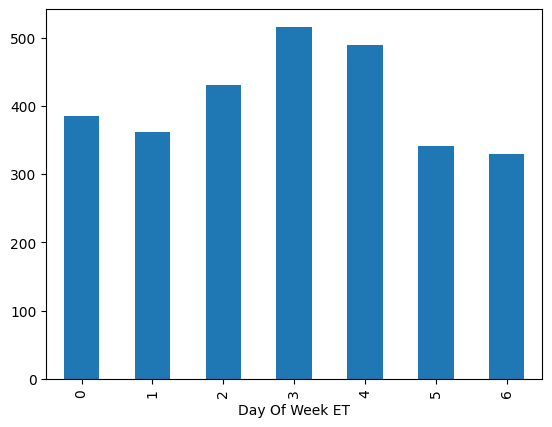

In [20]:
df[df['skyc1'] == 'CLR'].groupby('Day Of Week ET').size().plot(kind="bar");

Does every day have the same number of recorded observations?

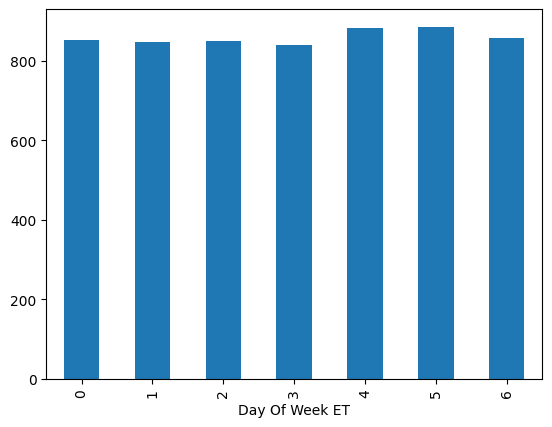

In [21]:
df.groupby('Day Of Week ET').size().plot(kind="bar");

In [22]:
percentage_clr_days_et_new = (df[df['skyc1'] == 'CLR'].groupby('Day Of Week ET').size() / df.groupby('Day Of Week ET').size()) * 100

In [23]:
percentage_clr_days_et_new

Day Of Week ET
0    45.187793
1    42.688679
2    50.705882
3    61.355529
4    55.379388
5    38.487585
6    38.389732
dtype: float64

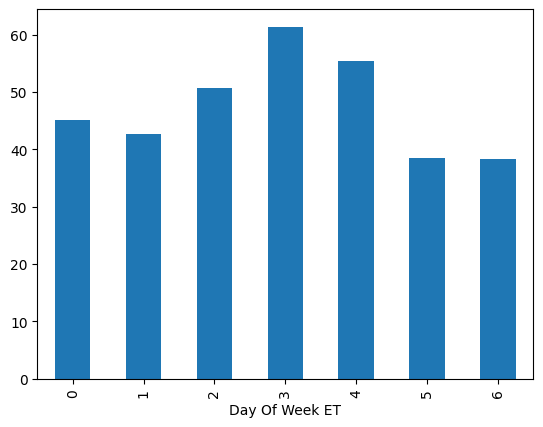

In [24]:
percentage_clr_days_et_new.plot(kind='bar');

In [25]:
# Recalculate the necessary components based on the 'Day Of Week ET' column from the new dataset with daylight information

# Total precipitation (p01i) for each day of the week
total_p01i_per_day_et_new = df.groupby('Day Of Week ET')['p01i'].sum()

# Percentage of OVC and CLR days
percentage_ovc_days_et_new = (df[(df['skyc1'] == 'OVC') | (df['skyc2'] == 'OVC') | (df['skyc3'] == 'OVC')].groupby('Day Of Week ET').size() / df.groupby('Day Of Week ET').size()) * 100
percentage_clr_days_et_new = (df[df['skyc1'] == 'CLR'].groupby('Day Of Week ET').size() / df.groupby('Day Of Week ET').size()) * 100

# Total number of rows (observations) for each day of the week
total_rows_per_day_et_new = df.groupby('Day Of Week ET').size()

# Combine all the data into one DataFrame
combined_et_df_new = pd.DataFrame({
    'Day Of Week ET': total_rows_per_day_et_new.index,
    'Total Number of Rows ET': total_rows_per_day_et_new.values,
    'Total p01i ET': total_p01i_per_day_et_new.values,
    'Percentage of OVC Days ET': percentage_ovc_days_et_new.values,
    'Percentage of CLR Days ET': percentage_clr_days_et_new.values
})

combined_et_df_new

,Day Of Week ET,Total Number of Rows ET,Total p01i ET,Percentage of OVC Days ET,Percentage of CLR Days ET
0,0,852,0.30,31.220657,45.187793
1,1,848,5.15,36.202830,42.688679
2,2,850,0.67,35.058824,50.705882
3,3,841,0.41,23.662307,61.355529
4,4,883,0.58,27.293318,55.379388
5,5,886,7.28,38.487585,38.487585
6,6,857,0.16,45.274212,38.389732


Conclusions? BTW what is day 5 and 6? How else could you define a good/bad day? What ways could you change the question to make your desired outcome more likely? Is this statistically significant?

## Exercises

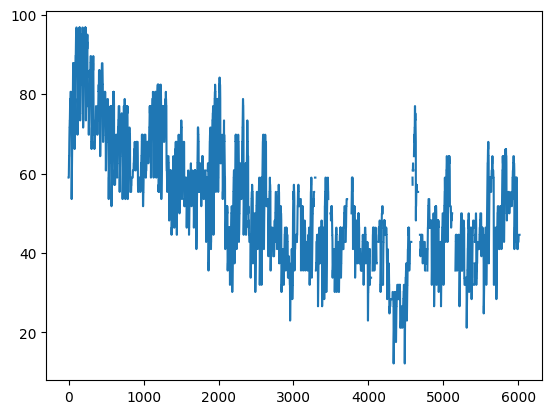

In [26]:
df['tmpf'].plot();

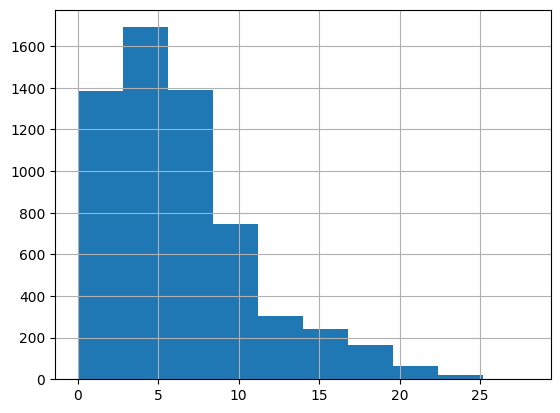

In [27]:
df['sknt'].hist();

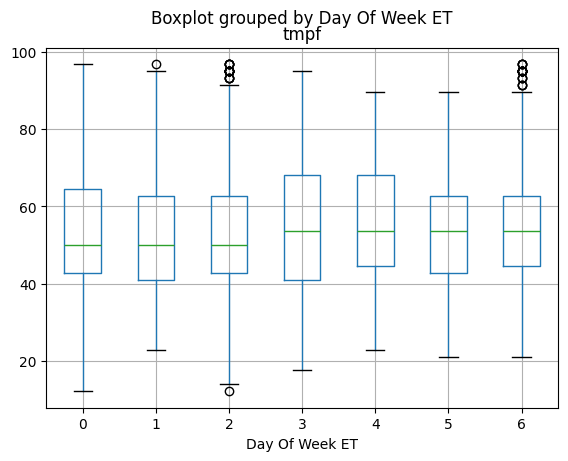

In [28]:
df.boxplot(column='tmpf',by='Day Of Week ET');

In [29]:
weekends = df[df['Day Of Week ET']>=5]
weekdays = df[df['Day Of Week ET']<5]

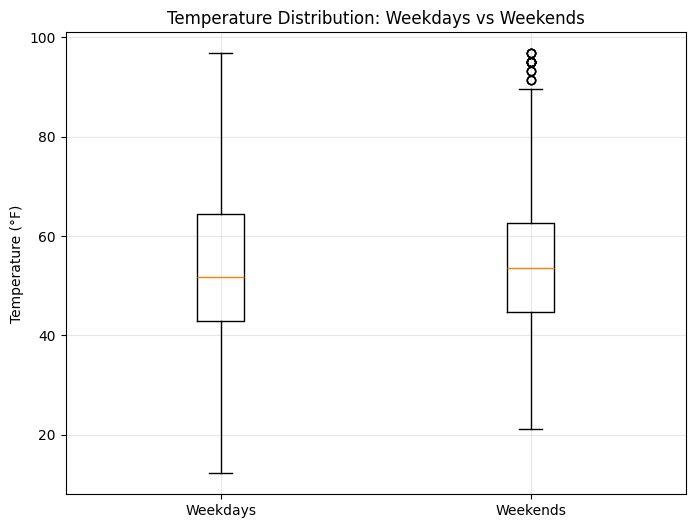

In [30]:
import matplotlib.pyplot as plt

# Remove any NaN values
weekdays_clean = weekdays['tmpf'].dropna()
weekends_clean = weekends['tmpf'].dropna()

plt.figure(figsize=(8, 6))
plt.boxplot([weekdays_clean, weekends_clean], 
           labels=['Weekdays', 'Weekends'])
plt.ylabel('Temperature (°F)')
plt.title('Temperature Distribution: Weekdays vs Weekends')
plt.grid(True, alpha=0.3)  # Add grid for better visibility
plt.show()  # Make sure this is here!

### Exercise 2

In [31]:
# Get the row(s) where temp equals the maximum value
max_temp_rows = df[df['tmpf'] == df['tmpf'].max()]
print(max_temp_rows[['tmpf','valid']])

     tmpf                      valid
103  96.8  2023-09-03 19:15:00+00:00
104  96.8  2023-09-03 19:35:00+00:00
105  96.8  2023-09-03 19:55:00+00:00
106  96.8  2023-09-03 20:15:00+00:00
142  96.8  2023-09-04 19:35:00+00:00
143  96.8  2023-09-04 19:55:00+00:00
144  96.8  2023-09-04 20:15:00+00:00
148  96.8  2023-09-04 21:35:00+00:00
149  96.8  2023-09-04 21:55:00+00:00
150  96.8  2023-09-04 22:15:00+00:00
186  96.8  2023-09-05 21:35:00+00:00
220  96.8  2023-09-06 20:15:00+00:00
221  96.8  2023-09-06 20:35:00+00:00
222  96.8  2023-09-06 20:55:00+00:00
224  96.8  2023-09-06 21:35:00+00:00
225  96.8  2023-09-06 21:55:00+00:00


In [32]:
# Get the row(s) where temp equals the maximum value
min_temp_rows = df[df['tmpf'] == df['tmpf'].min()]
print(min_temp_rows[['tmpf','valid']])

      tmpf                      valid
4336  12.2  2024-01-17 12:35:00+00:00
4483  12.2  2024-01-22 12:35:00+00:00
4484  12.2  2024-01-22 12:55:00+00:00
4485  12.2  2024-01-22 13:15:00+00:00


In [33]:
# Get the row with the largest temperature value
max_temp_row = df.nlargest(1, 'tmpf')
print(max_temp_row[['tmpf','valid']])

     tmpf                      valid
103  96.8  2023-09-03 19:15:00+00:00


In [34]:
df.groupby('Day Of Week ET')['tmpf'].mean()

Day Of Week ET
0    53.752239
1    53.215938
2    53.363158
3    54.130967
4    55.708333
5    53.176959
6    54.312113
Name: tmpf, dtype: float64

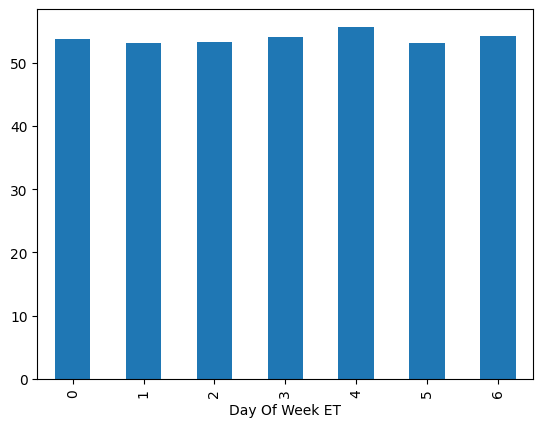

In [35]:
df.groupby('Day Of Week ET')['tmpf'].mean().plot.bar();

## Exercise 3

In [36]:
df.columns

Index(['id1', 'id2', 'station', 'valid', 'tmpf', 'dwpf', 'relh', 'drct',
       'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2',
       'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes',
       'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr',
       'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time', 'feel', 'metar',
       'snowdepth', 'valid_ET', 'Day Of Week ET', 'sunrise', 'sunset',
       'daylight'],
      dtype='object')

In [37]:
df[df.daylight==False].shape

(0, 37)

In [38]:
df[(df.skyc1=='CLR') & (df.sknt>15)]

,id1,id2,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth,valid_ET,Day Of Week ET,sunrise,sunset,daylight
542,542,1046,JYO,2023-09-15 13:55:00+00:00,62.6,50.0,63.38,30.0,17.0,0.0,30.16,NaN,10.0,21.0,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.60,KJYO 151355Z AUTO 03017G21KT 10SM CLR 17/10 A3...,NaN,2023-09-15 09:55:00-04:00,4,2023-09-15 10:49:36.862745+00:00,2023-09-15 23:16:32.118656+00:00,True
1326,1326,2582,JYO,2023-10-07 18:15:00+00:00,64.4,44.6,48.55,330.0,16.0,0.0,29.82,NaN,10.0,21.0,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.40,KJYO 071815Z AUTO 33016G21KT 300V360 10SM CLR ...,NaN,2023-10-07 14:15:00-04:00,5,2023-10-07 11:09:47.323617+00:00,2023-10-07 22:41:35.610632+00:00,True
1330,1330,2586,JYO,2023-10-07 19:35:00+00:00,64.4,39.2,39.43,320.0,17.0,0.0,29.82,NaN,10.0,22.0,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.40,KJYO 071935Z AUTO 32017G22KT 290V350 10SM CLR ...,NaN,2023-10-07 15:35:00-04:00,5,2023-10-07 11:09:47.323617+00:00,2023-10-07 22:41:35.610632+00:00,True
1332,1332,2588,JYO,2023-10-07 20:15:00+00:00,64.4,41.0,42.28,310.0,18.0,0.0,29.82,NaN,10.0,23.0,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.40,KJYO 072015Z AUTO 31018G23KT 10SM CLR 18/05 A2...,NaN,2023-10-07 16:15:00-04:00,5,2023-10-07 11:09:47.323617+00:00,2023-10-07 22:41:35.610632+00:00,True
1333,1333,2589,JYO,2023-10-07 20:35:00+00:00,62.6,39.2,42.00,310.0,18.0,0.0,29.82,NaN,10.0,21.0,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.60,KJYO 072035Z AUTO 31018G21KT 10SM CLR 17/04 A2...,NaN,2023-10-07 16:35:00-04:00,5,2023-10-07 11:09:47.323617+00:00,2023-10-07 22:41:35.610632+00:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,5237,11922,JYO,2024-02-15 19:55:00+00:00,50.0,32.0,49.81,190.0,18.0,0.0,29.92,NaN,10.0,22.0,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,KJYO 151955Z AUTO 19018G22KT 10SM CLR 10/00 A2...,NaN,2024-02-15 14:55:00-05:00,3,2024-02-15 12:00:10.476992+00:00,2024-02-15 22:44:55.051111+00:00,True
5239,5239,11924,JYO,2024-02-15 20:35:00+00:00,50.0,32.0,49.81,200.0,18.0,0.0,29.91,NaN,10.0,25.0,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,KJYO 152035Z AUTO 20018G25KT 10SM CLR 10/00 A2...,NaN,2024-02-15 15:35:00-05:00,3,2024-02-15 12:00:10.476992+00:00,2024-02-15 22:44:55.051111+00:00,True
5241,5241,11926,JYO,2024-02-15 21:15:00+00:00,50.0,32.0,49.81,190.0,16.0,0.0,29.88,NaN,10.0,22.0,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,KJYO 152115Z AUTO 19016G22KT 10SM CLR 10/00 A2...,NaN,2024-02-15 16:15:00-05:00,3,2024-02-15 12:00:10.476992+00:00,2024-02-15 22:44:55.051111+00:00,True
5680,5680,12907,JYO,2024-02-29 14:35:00+00:00,35.6,19.4,51.33,320.0,16.0,0.0,30.42,NaN,10.0,20.0,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.11,KJYO 291435Z AUTO 32016G20KT 10SM CLR 02/M07 A...,NaN,2024-02-29 09:35:00-05:00,3,2024-02-29 11:41:25.879477+00:00,2024-02-29 23:00:11.780833+00:00,True


In [39]:
df[df.tmpf>70].shape

(880, 37)

In [40]:
df[df.tmpf>-10000].shape

(5705, 37)

In [41]:
df.shape

(6017, 37)